# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Marielle Howell

## What does a Simple Linear Regression Model do?
#### A simple linear regression model uses a single independent variable to predict the value of a dependent variable.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('diamonds')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- R-values measure the linear correlation between two variables.
- It uses a range between 1.0 and -1.0.
- A positive correlation is present when the r-value is closer to 1.0.
- A negative correlation is present when the r-value is closer to -1.0.
- There will be no correlation or low correlation as the r-value gets closer to 0.

In [4]:
data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

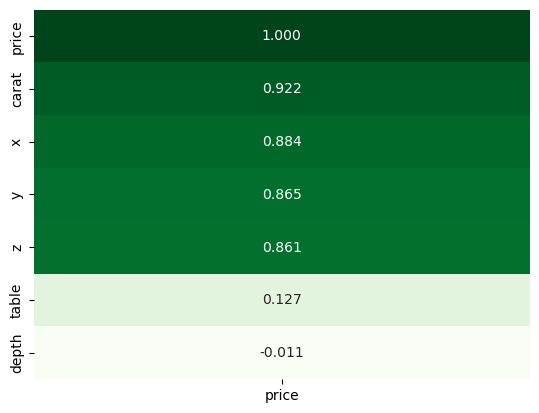

In [5]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', fmt=f'.3f', cbar=False)

## Procedure for Creating and Using a Regression Model
1. Split the dataset into a training dataset and a test dataset.
2. Create a regression model using the training dataset.
3. Validate the model using the test dataset.
4. If the model is valid, use it to predict data.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']], 
    test_size=0.30, random_state=20)

In [8]:
model = LinearRegression()
model

LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.score(x_test, y_test)

0.8504107786474794

In [11]:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [13]:
predicted_data = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted_data.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [14]:
combined = x_test.reset_index(drop=True).join([y_test.reset_index(drop=True),
                                               predicted_data.reset_index(drop=True)])
combined.head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [15]:
melted = pd.melt(combined, id_vars=['carat'], 
                 value_vars=['price','predicted_price'], 
                 var_name='price_type', value_name='price_value')

melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


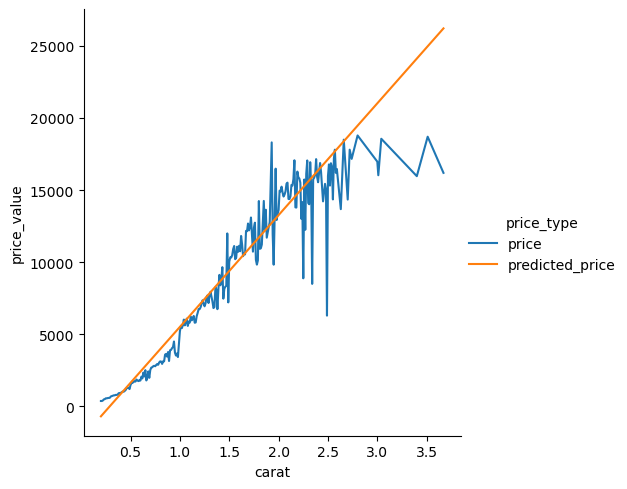

In [16]:
sns.relplot(data=melted, kind='line', x='carat', y='price_value', ci=None, hue='price_type')

## Regression line equation is **y = mx + b**, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept**

In [17]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [18]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [19]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800453947


In [20]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800453947


In [21]:
diamond1 = m * 0.70 + b
print(f'The predicted price for a 0.70 carat diamond is ${float(diamond1):.2f}')

The predicted price for a 0.70 carat diamond is $3173.14


In [22]:
diamond2 = m * 0.54 + b
print(f'The predicted price for a 0.54 carat diamond is ${float(diamond2):.2f} ')

The predicted price for a 0.54 carat diamond is $1932.11 


The predicted prices in the prior cells are close to the predicted prices in step 18 with an almost $8 difference between predicted values.